In [ ]:
### Feature Description

Loan_ID 	Loan reference number

Gender 	Applicant gender - (Male or Female)

Married 	Applicant marital status (Married or not married) 

Dependents 	Number of family members 	0; 1; 2; 3+

Education 	Applicant education/qualification 
(graduate or not graduate) 	Graduate; Under Graduate

Self_Employed 	Applicant employment status
(yes for self-employed, no for employed/others) 	Yes; No

ApplicantIncome 	Applicant's monthly salary/income

CoapplicantIncome 	Additional applicant's monthly salary/income 

LoanAmount 	Loan amount 	128; 66; ...

Loan_Amount_Term 	The loan's repayment period (in days) 

Credit_History 	Records of previous credit history
(0: bad credit history, 1: good credit history) 	0; 1

Property_Area 	The location of property
(Rural/Semiurban/Urban) 	Rural; Semiurban; Urban

Loan_Status 	Status of loan
(Y: accepted, N: not accepted)

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [327]:
df.shape

(614, 13)

In [328]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [329]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [330]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [331]:
for i in nv.index:
    print(i)
    print(df[i].value_counts())
    print('*'*30)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
******************************
Married
Yes    398
No     213
Name: Married, dtype: int64
******************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
******************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
******************************
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
******************************


In [332]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [333]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [334]:
cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in cols:
    df[i] = df[i].fillna(df[i].mode()[0])

In [335]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [336]:
cols = ['LoanAmount','Loan_Amount_Term']
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [337]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [338]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


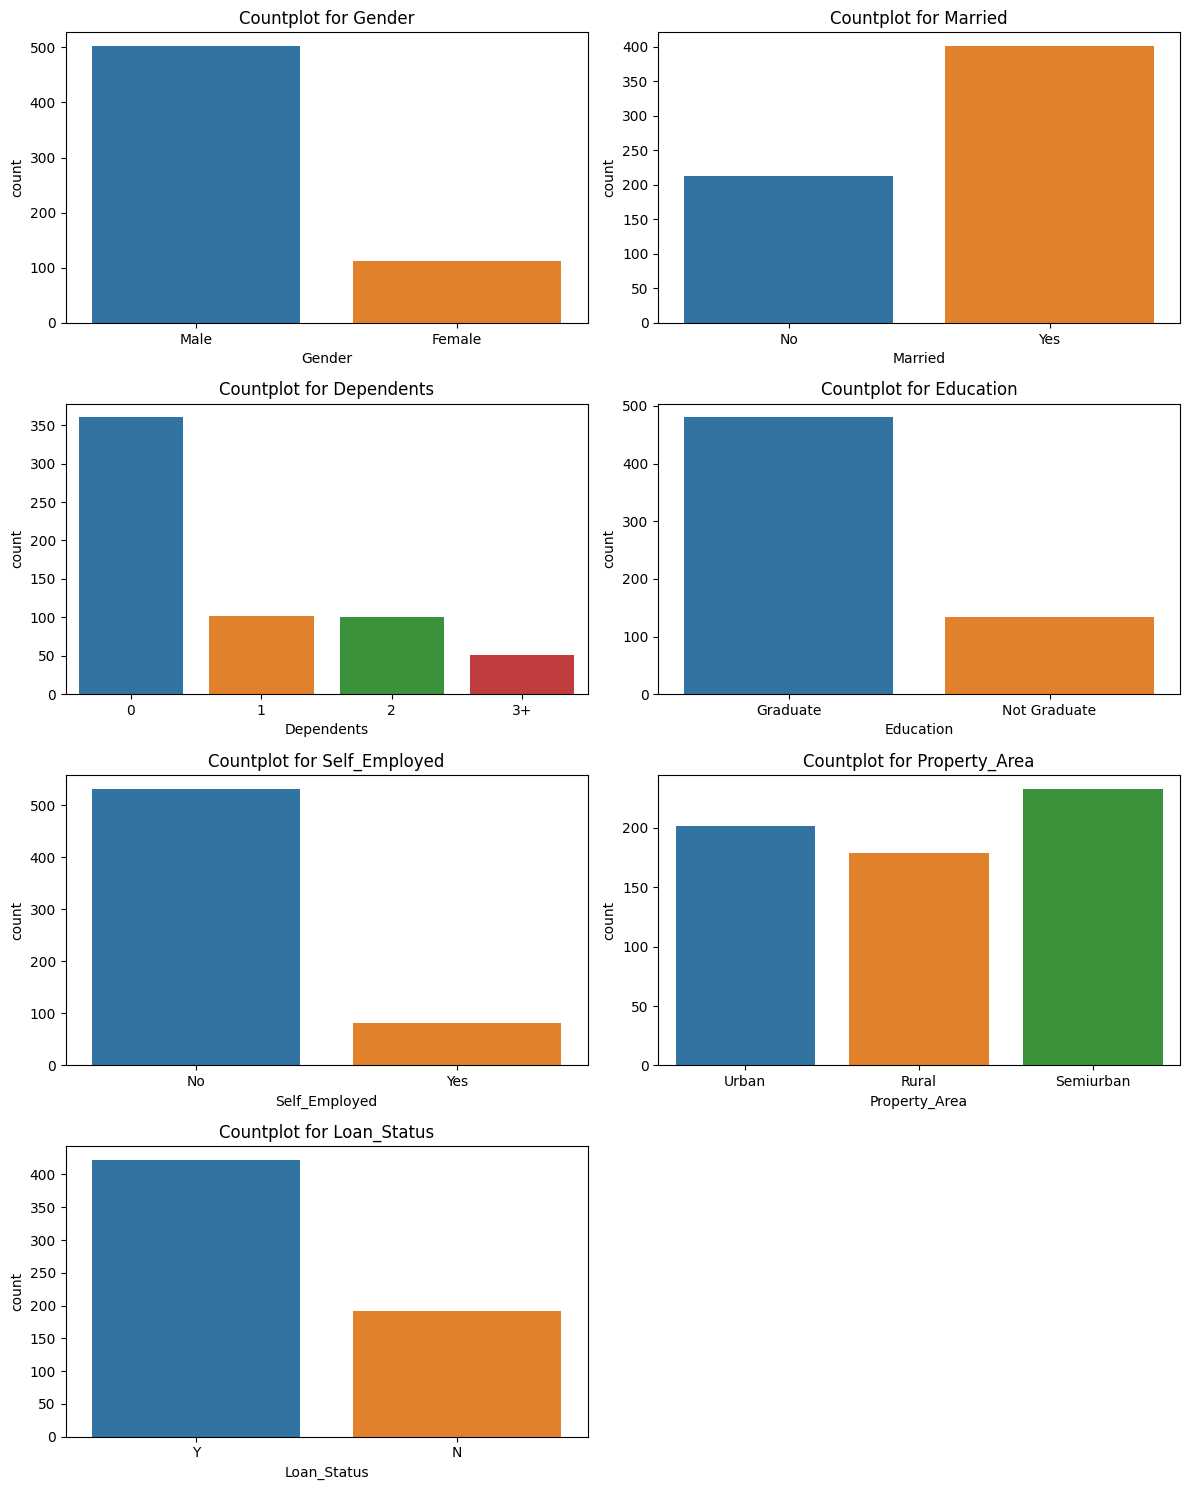

In [339]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

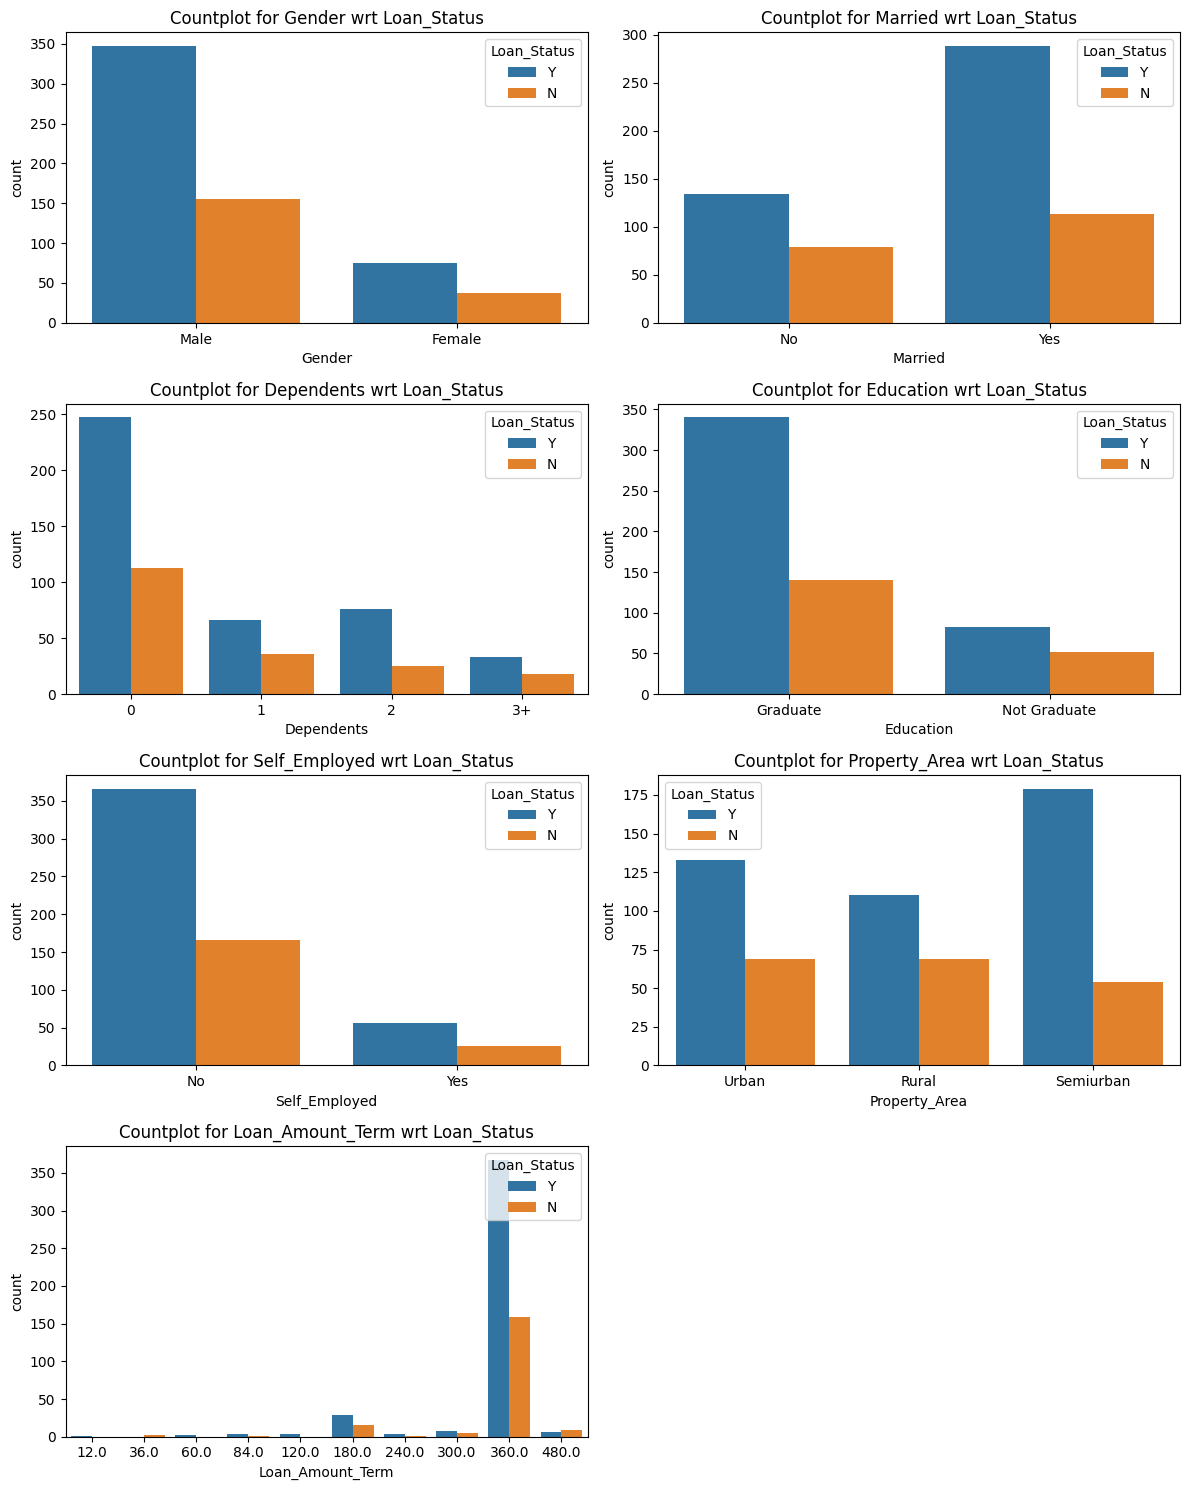

In [340]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area','Loan_Amount_Term']

plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Loan_Status'])
    plt.title(f'Countplot for {cols[i]} wrt Loan_Status')

plt.tight_layout()
plt.show()

In [341]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

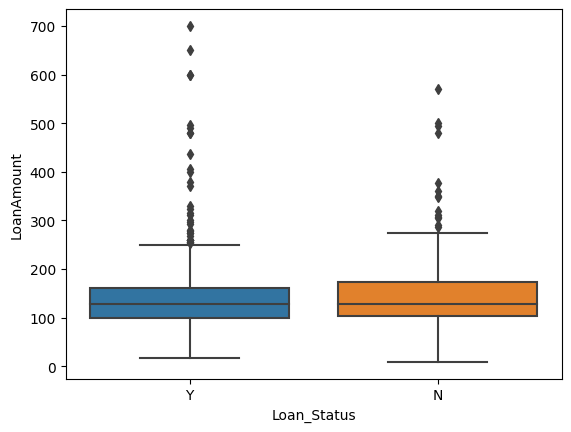

In [342]:
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'])
plt.show()

In [343]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

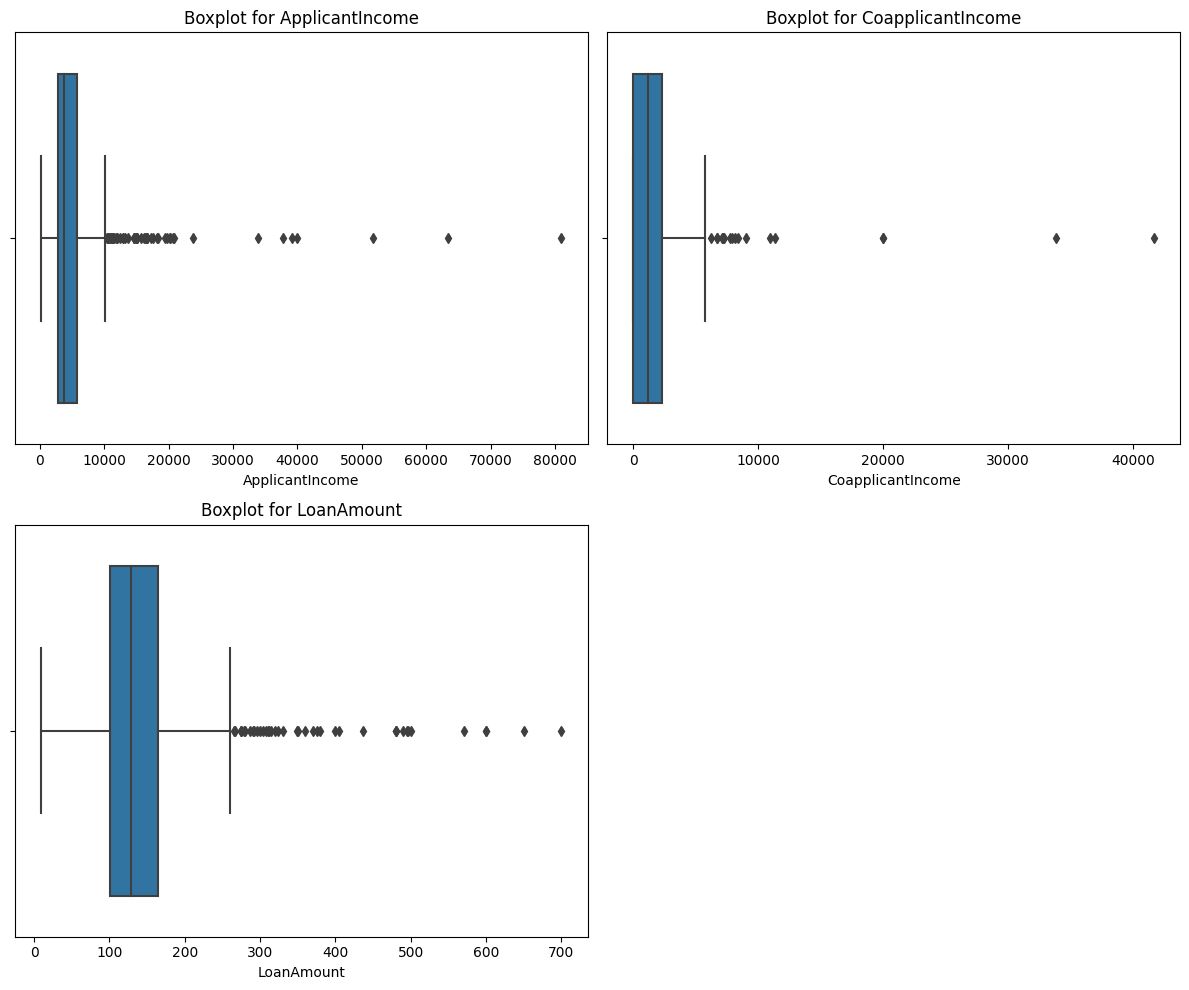

In [344]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
     

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1956\906866642.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


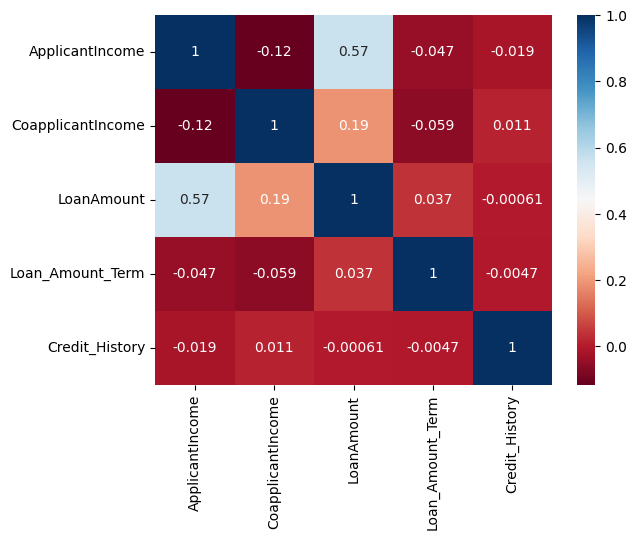

In [345]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [346]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,98%,99%,max
ApplicantIncome,150.0,1025.00,1554.12,1800.00,3812.5,19666.04,32540.41,81000.0
CoapplicantIncome,0.0,0.00,0.00,0.00,1188.5,7198.56,8895.89,41667.0
LoanAmount,9.0,30.65,44.00,48.78,128.0,427.94,495.87,700.0
Loan_Amount_Term,12.0,84.00,180.00,180.00,360.0,480.00,480.00,480.0
Credit_History,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0


In [347]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

# def outlier_treatment(x):
#     x = x.clip(upper=x.quantile(0.99))
#     x = x.clip(lower=x.quantile(0.01))
#     return x

In [348]:
# df[cols] = df[cols].apply(outlier_treatment)

In [349]:
for i in df[cols]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    df[i] = np.where(df[i]>upper,upper,df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])

In [350]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,98%,99%,max
ApplicantIncome,150.0,1025.00,1554.12,1800.00,3812.5,10171.250,10171.250,10171.250
CoapplicantIncome,0.0,0.00,0.00,0.00,1188.5,5743.125,5743.125,5743.125
LoanAmount,9.0,30.65,44.00,48.78,128.0,261.500,261.500,261.500
Loan_Amount_Term,12.0,84.00,180.00,180.00,360.0,480.000,480.000,480.000
Credit_History,0.0,0.00,0.00,0.00,1.0,1.000,1.000,1.000


#### Encode Categorical features

In [351]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [352]:
for i in cat_cols[1:]:
    print(i,df[i].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [353]:
# df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
# df['Married'] = df['Married'].map({'Yes':1,'No':0})
# df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
# df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [354]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [355]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [356]:
df_dum = pd.get_dummies(data=df,columns=['Dependents','Property_Area',
                                        "Gender",'Married','Education','Self_Employed'],
                        drop_first=True)
print(df_dum.shape)
df_dum.columns

(614, 16)


Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes'],
      dtype='object')

In [357]:
# df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
# df['Loan_Status'].value_counts()

#### Select x and y

In [358]:
df_dum['Loan_Status'] = df_dum['Loan_Status'].map({'Y':1,'N':0})
df_dum['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [359]:
x = df_dum.drop(['Loan_ID','Loan_Status'],axis=1)
y = df_dum['Loan_Status']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(614, 14)
(614,)


In [360]:
x.dtypes.value_counts()

uint8      9
float64    5
dtype: int64

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 14)
(185, 14)
(429,)
(185,)


In [364]:
# df['Loan_Status'].value_counts()

In [175]:
#### 

In [365]:
from sklearn.metrics import *

In [366]:
def eval_model(model,x_train,y_train,x_test,y_test,model_name):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    crep = classification_report(y_test,ypred)
    print(cm)
    print(crep)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    pre1 = precision_score(y_test,ypred)
    rec1 = recall_score(y_test,ypred)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc,'Pre1':pre1,'Rec1':rec1},
                      index=[model_name])
    return res,ypred

#### 1) LogReg Model

In [367]:
from sklearn.linear_model import LogisticRegression

In [369]:
lr1 = LogisticRegression()
lr1_res,ypred_lr1 =  gen_res(lr1,x_train,y_train,x_test,y_test,'LogReg')
lr1_res

[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



,Train_Acc,Test_Acc,Pre1,Rec1
LogReg,0.818182,0.783784,0.75641,0.983333


In [370]:
ypred_lr1_proba = lr1.predict_proba(x_test)
print(ypred_lr1_proba[:10])

[[0.17038744 0.82961256]
 [0.12566267 0.87433733]
 [0.18300353 0.81699647]
 [0.21537813 0.78462187]
 [0.15139028 0.84860972]
 [0.26022374 0.73977626]
 [0.09265312 0.90734688]
 [0.18549488 0.81450512]
 [0.27884869 0.72115131]
 [0.26230381 0.73769619]]


In [372]:
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('AUC',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

AUC 0.7766666666666666


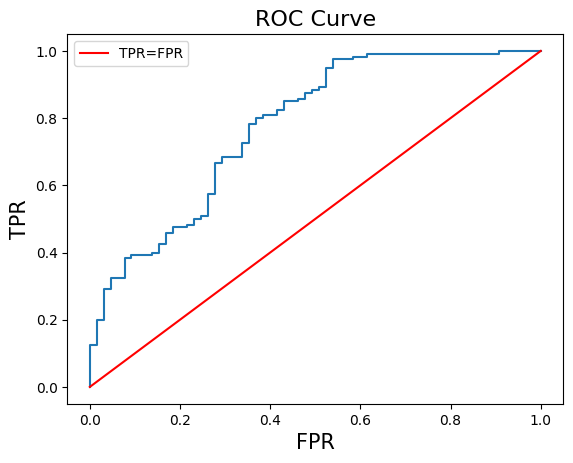

In [373]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr1,y_test,ypred_lr1_proba)

In [375]:
best_thresh1 = thresh_lr1[np.argmax(abs(tpr_lr1-fpr_lr1))]
print(best_thresh1)

0.6008854436415878


In [376]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(thresh_lr1[best_thresh_idx])

0.7486177997955475


In [377]:
best_thresh3 = thresh_lr1[np.argmax(np.sqrt(tpr_lr1*(1-fpr_lr1)))] 
print(best_thresh3)

0.7486177997955475


In [378]:
ypred_lr2 = np.where(ypred_lr1_proba[:,1]>best_thresh1,1,0)
print(ypred_lr2)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [379]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)  
pre_lr2 = precision_score(y_test,ypred_lr2)  # pre_score for 1
rec_lr2 = recall_score(y_test,ypred_lr2)     # rec_score for 1

lr2_res = pd.DataFrame({'Pre1':pre_lr2,'Rec1':rec_lr2,'Acc':acc_lr2},
                       index=[f'LogReg(th={round(best_thresh1,3)})'])
lr2_res

,Pre1,Rec1,Acc
LogReg(th=0.601),0.768212,0.966667,0.789189


#### KS Test

In [380]:
ypred_lr_proba = lr1.predict_proba(x_test)

In [381]:
ypred_lr_proba

array([[0.17038744, 0.82961256],
       [0.12566267, 0.87433733],
       [0.18300353, 0.81699647],
       [0.21537813, 0.78462187],
       [0.15139028, 0.84860972],
       [0.26022374, 0.73977626],
       [0.09265312, 0.90734688],
       [0.18549488, 0.81450512],
       [0.27884869, 0.72115131],
       [0.26230381, 0.73769619],
       [0.58254432, 0.41745568],
       [0.22442596, 0.77557404],
       [0.16638931, 0.83361069],
       [0.22082987, 0.77917013],
       [0.11564213, 0.88435787],
       [0.12993035, 0.87006965],
       [0.25479731, 0.74520269],
       [0.14957542, 0.85042458],
       [0.16779851, 0.83220149],
       [0.05159777, 0.94840223],
       [0.21919548, 0.78080452],
       [0.1148858 , 0.8851142 ],
       [0.20125748, 0.79874252],
       [0.2251569 , 0.7748431 ],
       [0.19606136, 0.80393864],
       [0.28003723, 0.71996277],
       [0.36917642, 0.63082358],
       [0.19395628, 0.80604372],
       [0.150499  , 0.849501  ],
       [0.06601255, 0.93398745],
       [0.

In [382]:
ksd = pd.DataFrame()
ksd['Target'] = y_test
ksd['Prob1'] = ypred_lr_proba[:,1]
ksd.head()

,Target,Prob1
350,1,0.829613
377,1,0.874337
163,1,0.816996
609,1,0.784622
132,1,0.848610


In [383]:
ksd['Decile'] = pd.qcut(ksd['Prob1'],10,labels=np.arange(0,10,1)).astype(int)
ksd["Decile"] = (10 - ksd['Decile']).astype('int')
ksd.head()

,Target,Prob1,Decile
350,1,0.829613,4
377,1,0.874337,2
163,1,0.816996,4
609,1,0.784622,5
132,1,0.848610,3


In [384]:
res = ksd.groupby(['Decile']).agg(
                                Min_Score=('Prob1','min'),
                                Max_Score=('Prob1','max'),
                                Event = ('Target','sum'),
                                Total = ('Target','count'))
res

,Min_Score,Max_Score,Event,Total
Decile,,,,
1,0.898037,0.948402,18,19
2,0.870070,0.897637,17,18
3,0.835947,0.867904,12,19
4,0.813121,0.835643,12,18
5,0.784622,0.811738,15,18
6,0.753578,0.782236,14,19
7,0.716163,0.753460,13,18
8,0.630824,0.710407,13,19
9,0.265818,0.622387,5,18


In [385]:
res['Non_Event'] = res['Total'] - res['Event']
res

,Min_Score,Max_Score,Event,Total,Non_Event
Decile,,,,,
1,0.898037,0.948402,18,19,1
2,0.870070,0.897637,17,18,1
3,0.835947,0.867904,12,19,7
4,0.813121,0.835643,12,18,6
5,0.784622,0.811738,15,18,3
6,0.753578,0.782236,14,19,5
7,0.716163,0.753460,13,18,5
8,0.630824,0.710407,13,19,6
9,0.265818,0.622387,5,18,13


In [386]:
print(y_test.shape)
print(res['Total'].sum())
print(res['Event'].sum())

(185,)
185
120


In [387]:
from collections import Counter
Counter(y_test)

Counter({1: 120, 0: 65})

In [388]:
res['Event%'] = res['Event']/res['Event'].sum()
res['Non_event%'] = res['Non_Event']/res['Non_Event'].sum()
res

,Min_Score,Max_Score,Event,Total,Non_Event,Event%,Non_event%
Decile,,,,,,,
1,0.898037,0.948402,18,19,1,0.150000,0.015385
2,0.870070,0.897637,17,18,1,0.141667,0.015385
3,0.835947,0.867904,12,19,7,0.100000,0.107692
4,0.813121,0.835643,12,18,6,0.100000,0.092308
5,0.784622,0.811738,15,18,3,0.125000,0.046154
6,0.753578,0.782236,14,19,5,0.116667,0.076923
7,0.716163,0.753460,13,18,5,0.108333,0.076923
8,0.630824,0.710407,13,19,6,0.108333,0.092308
9,0.265818,0.622387,5,18,13,0.041667,0.200000


In [389]:
res['Cum_Event%'] = np.cumsum(res['Event%'])
res['Cum_Non_Event%'] = np.cumsum(res['Non_event%'])
res['Diff'] = res['Cum_Event%'] - res['Cum_Non_Event%']
res

,Min_Score,Max_Score,Event,Total,Non_Event,Event%,Non_event%,Cum_Event%,Cum_Non_Event%,Diff
Decile,,,,,,,,,,
1,0.898037,0.948402,18,19,1,0.150000,0.015385,0.150000,0.015385,1.346154e-01
2,0.870070,0.897637,17,18,1,0.141667,0.015385,0.291667,0.030769,2.608974e-01
3,0.835947,0.867904,12,19,7,0.100000,0.107692,0.391667,0.138462,2.532051e-01
4,0.813121,0.835643,12,18,6,0.100000,0.092308,0.491667,0.230769,2.608974e-01
5,0.784622,0.811738,15,18,3,0.125000,0.046154,0.616667,0.276923,3.397436e-01
6,0.753578,0.782236,14,19,5,0.116667,0.076923,0.733333,0.353846,3.794872e-01
7,0.716163,0.753460,13,18,5,0.108333,0.076923,0.841667,0.430769,4.108974e-01
8,0.630824,0.710407,13,19,6,0.108333,0.092308,0.950000,0.523077,4.269231e-01
9,0.265818,0.622387,5,18,13,0.041667,0.200000,0.991667,0.723077,2.685897e-01
